<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Using_Pytorch_to_fight_cancer_(IV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pytorch to Fight Cancer

## 1. ALL IN!!!!


LET'S GET STARTED!!!!

### Setting our work environment

First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.

---
**Display Basic GPU Information**

---

In [1]:
!nvidia-smi

Fri Jun 21 11:36:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:35:00.0 Off |                    0 |
| N/A   33C    P8              11W /  72W |      0MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`



---
**Setting our Home**

---

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [2]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/teamspace/studios/this_studio


Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

---
**Mount Google Drive**

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## 2. Load a dataset (dataloader)

Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.

---
**Create a directory where we can save our dataset**

---

In [4]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/teamspace/studios/this_studio


Check if the file specified by `file` does not exist in the current directory. If it doesn't exist, the code block inside the conditional, which in this case would be downloading the file from the specified URL, is executed. then, it extracts the contents of `exp0.zip` into the current directory quietly, overwriting any existing files if necessary.

---
**Change to new directory datasets**

---

In [5]:
# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp4val.zip'):
  !wget -q https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
!unzip -qq -o exp4val.zip

dataset_dir = /teamspace/studios/this_studio/datasets


### Inspect the Dataset

# Skin lesion recognition in 7 classes:

*  0: 'akiec' - actinic keratosis

*  1: 'bcc' - basal cell carcinoma

*  2: 'bkl' - benign keratosis

*  3: 'df' - dermatofibroma

*  4: 'mel' - melanoma

*  5: 'nv' - melanocytic nevus

*  6: 'vasc' - vascular lesion


The dataset contains several thousand photos of cell images in seven subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:

---
**Display the datapath structure.**

---

In [6]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- __MACOSX
        |-- exp0
            |-- test
                |-- class_0
                |-- class_1
            |-- train
                |-- class_0
                |-- class_1
            |-- val
                |-- class_0
                |-- class_1
        |-- train
            |-- class_6
            |-- class_4
            |-- class_3
            |-- class_2
            |-- class_0
            |-- class_1
            |-- class_5
        |-- test
            |-- class_1
        |-- val
            |-- class_0
    |-- exp0
        |-- test
            |-- class_0
            |-- class_1
        |-- train
            |-- class_0
            |-- class_1
        |-- val
            |-- class_0
            |-- class_1
    |-- train
        |-- class_6
        |-- class_4
        |-- class_3
        |-- class_2
        |-- class_0
        |-- class_1
        |-- class_5
    |-- test
        |-- class_6
        |-- class_4
        |-- class_3
        |-- class_2
    


---
**Display 8 images from a class from test**

---

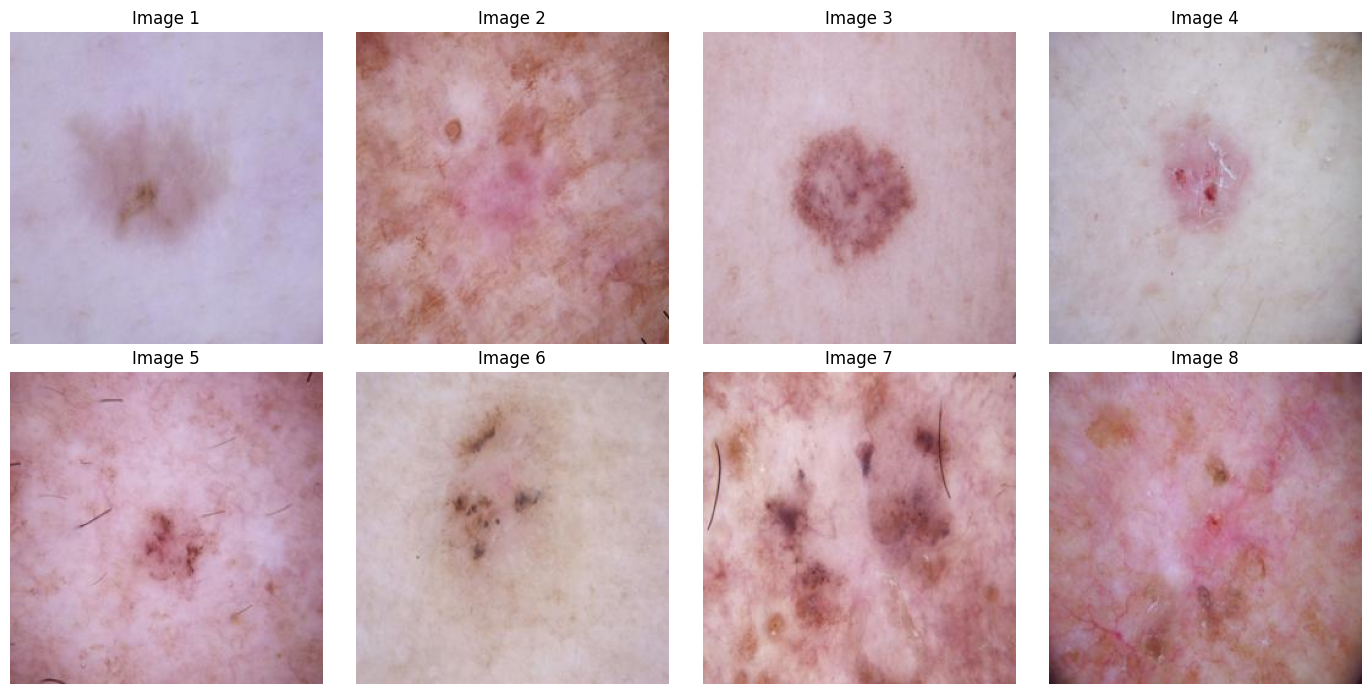


 Size of image:  (256, 256, 3)


In [8]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = HOME + f'/datasets/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader

The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. Its main purpose is to facilitate the efficient loading and manipulation of data during model training.



---
**Load Libraries for DataLoader**

---

In [9]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, ConcatDataset

>**Note**: These time magics (%time and %%time) will give you information about how long it takes to execute the code in the respective cell in Google Colab. The results will be displayed below the cell after the execution is completed.

---
**Create a Dataloader for train, val y test sets**

---

In [11]:
%%time

# 1. Calculate the mean and standard deviation on the training set.
# train, validation and test data directory

train_dir = HOME + "/datasets/train/"
val_dir  = HOME + "/datasets/test/"
test_dir   = HOME + "/datasets/val/"

# transform to calculate mean and standard desviation
transform = transforms.Compose([
    transforms.ToTensor()  # transform images to tensor
])

# Load the ImageFolder dataset and apply the transformation
dataset = datasets.ImageFolder(root= train_dir, transform=transform)

# it's better to use a loader to retrieve images (tensors)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables to store the sum of pixel values and
# standard deviation.
# These variables are set to floating-point zeros to ensure
# accurate calculations.
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

# Iterates over the data loader (loader),
# calculates the mean and standard deviation across all channels
# for each batch(0) and spatial dimensions (height(2) and width(3))
for images, _ in loader:
    mean_sum += torch.mean(images, dim=[0, 2, 3])
    std_sum += torch.std(images, dim=[0, 2, 3])
    total_samples += 1

mean = mean_sum / total_samples
std = std_sum / total_samples

print("Total train samples:", total_samples)
print("Mean:", mean)
print("Std:", std)

Total train samples: 7350
Mean: tensor([0.7536, 0.5706, 0.6018])
Std: tensor([0.0849, 0.1106, 0.1187])
CPU times: user 1min 32s, sys: 229 ms, total: 1min 32s
Wall time: 12.2 s


---
**Transform the dataloaders for data augmentation**

---
- **Initial Transformations**: Various augmentation techniques like flipping, cropping, rotating, color jittering, affine transformations, blurring, and perspective changes are defined.  
- **Enhancing Transformations**: Each augmentation technique is enhanced by converting images to tensors and normalizing them.  
- **Final Output**: The list of transformations is updated and printed.

These transformations are typically applied during the training process to increase the diversity of the training data, helping to improve the generalization of the deep learning model.


In [12]:
%%time

# Define the data transformations to be applied
# to each transformed dataset
transformations = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(64, padding=4),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomPerspective(),
    #transforms.RandomErasing(p=0.5, scale=(1.0, 1.0), ratio=(1.0, 1.0),value='random'),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.2), ratio=(0.75, 1.33333333)),
]

# Add the ToTensor() and Normalize() transformation
# to each data transformation
for i in range(len(transformations)):
    transformations[i] = transforms.Compose([
        transformations[i],
        transforms.Resize((64,64)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

print(transformations)

[Compose(
    RandomHorizontalFlip(p=0.5)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    RandomCrop(size=(64, 64), padding=4)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=None)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0

---
**Normalize the dataloaders using Statistics**

---

- **Normalization**: Normalization is crucial for ensuring that pixel values across images are on a similar scale, which helps in stabilizing and speeding up the training process of deep neural networks.  
- **Dataset Preparation**: Each dataset (`train_data`, `val_set`, `test_set`) is prepared with consistent transformations and normalization, facilitating uniformity in data processing across training, validation, and testing phases.

This setup ensures that the datasets are properly preprocessed and ready to be used in training and evaluating machine learning models, particularly deep neural networks, using PyTorch.

In [14]:
%%time

# 2. Normalize the training set using these statistics.
train_data = datasets.ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

# 3. Normalize the test and validation set using the same statistics
# calculated on the training set.
val_set = datasets.ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

test_set = datasets.ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

print(f"Length of Train Data :{len(train_data)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")

classes = train_data.classes
print('Classes: ', classes)

Length of Train Data :7350
Length of Validation Data : 210
Length of Test Data : 1050
Classes:  ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
CPU times: user 18.2 ms, sys: 71 µs, total: 18.3 ms
Wall time: 17.1 ms


The train set is unmodified in size because `transform()` transform the data but it don't augment the dataset

---
**Augment Data**

---

The train set is modified in size because `ConcatDataset()` augment the dataset.

### Displaying all classes

Let us show one example for each class, for fun. As we've transformed the image by normalizing it, we should undo the transformation before visualizing the image.

---
**Display one example from each class**

---


In [15]:
# Apply each transformation separately to a transformed dataset
# and concatenate them.
train_set = train_data
for transform in transformations:
    transformed_data = datasets.ImageFolder(train_dir,transform = transform)
    train_set = ConcatDataset([train_set, transformed_data])

print(f"Length of Train Data :{len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")


Length of Train Data :66150
Length of Validation Data : 210
Length of Test Data : 1050


### Displaying all classes

Let us show one example for each class, for fun. As we've transformed the image by normalizing it, we should undo the transformation before visualizing the image.

---
**Display one example from each class**

---


CPU times: user 17.1 s, sys: 480 ms, total: 17.6 s
Wall time: 17.6 s


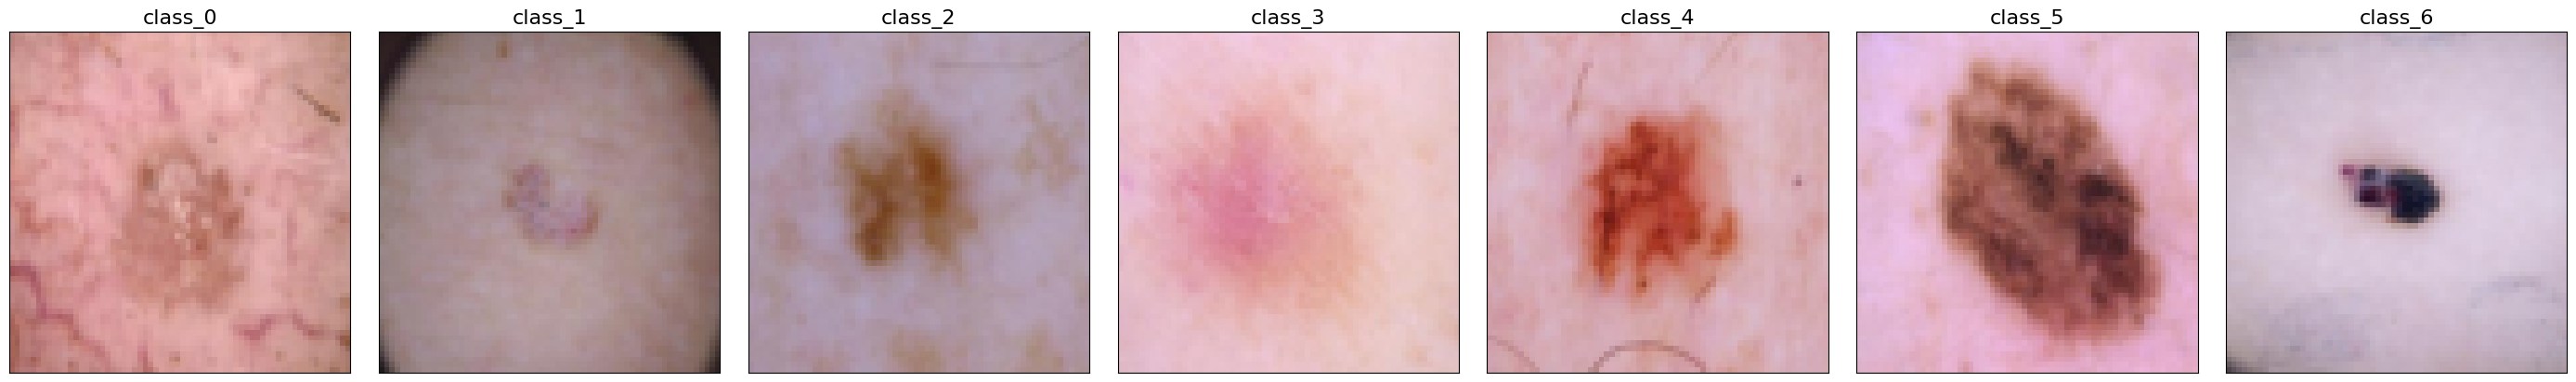

In [16]:
%%time
inv_normalize = transforms.Normalize(
  mean= [-m/s for m, s in zip(mean, std)],
  std= [1/s for s in std]
)

fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(7*4,1*4),
                       subplot_kw={'facecolor': "#ebf5ff"})

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[i], fontsize=16)
  img = next(img for img,label in train_set if label == i)
  #ax.imshow(img.permute(1,2,0)) # for normalized channels
  ax.imshow(inv_normalize(img).permute(1,2,0)) # for unnormalized

fig.tight_layout()


### Settings Hyperparameters

We are going to define some training parameters for the network, such as the number of batches, epochs, and classes in the dataset because they are needed for dataloaders in order to set up our training loop.

---
**Define batch_size, epochs and obtain the number of classes**

---

We will **run only 5 epochs** to check functionality. Later, we will load a model that has already been trained for 30 epochs.

In [17]:
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 20
# num_classes define the number of the class
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")

Number of Classes: 7


----
**Define the train and test loaders for the training loop**

---

In [38]:
%%time

# Create dataloaders object for training/val loop.

train_dataloader = DataLoader(
  train_set,
  batch_size=batch_size,
  shuffle=True,
  num_workers=2)

val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)

CPU times: user 231 µs, sys: 26 µs, total: 257 µs
Wall time: 260 µs




Now, we define a function to obtain ncols and nrows need for a given number of images in order to display them.

---
**Define a small function to determine the columns and rows needed for a given number of images**

---

In [19]:
# We define a small function to determine the columns and rows needed
# for a given number of images.
def rows_cols(input):

    divisors = []

    # Realize a little operation with input
    # in order to determine divisors for input
    for i in range(1, input+1): # not divide by 0
        if input % i == 0:
            divisors.append(i)

    # divisors list size
    n = len(divisors)

    # If the size is odd, the element in the middle is the median value.
    if n % 2 != 0:
        median_index = (n - 1) // 2
        rows = divisors[median_index]
    # If the size is even, the two elements in the middle are equal
    else:
        median_index1 = n // 2 - 1
        rows = divisors[median_index1]

    cols = int(input/rows)
    return rows, cols


To see how the DataLoader works and how it handles the loaded data, we will select a random batch and display it, indicating its class label as well. It is said, we can display all images and its ground truth from a random batch in a easy way with dataloaders.

---
**Display all images and its ground truth from a random batch**

---

Alongside 'normal' images, we should observe transformed images.

CPU times: user 1.25 s, sys: 1.74 s, total: 3 s
Wall time: 18.4 s


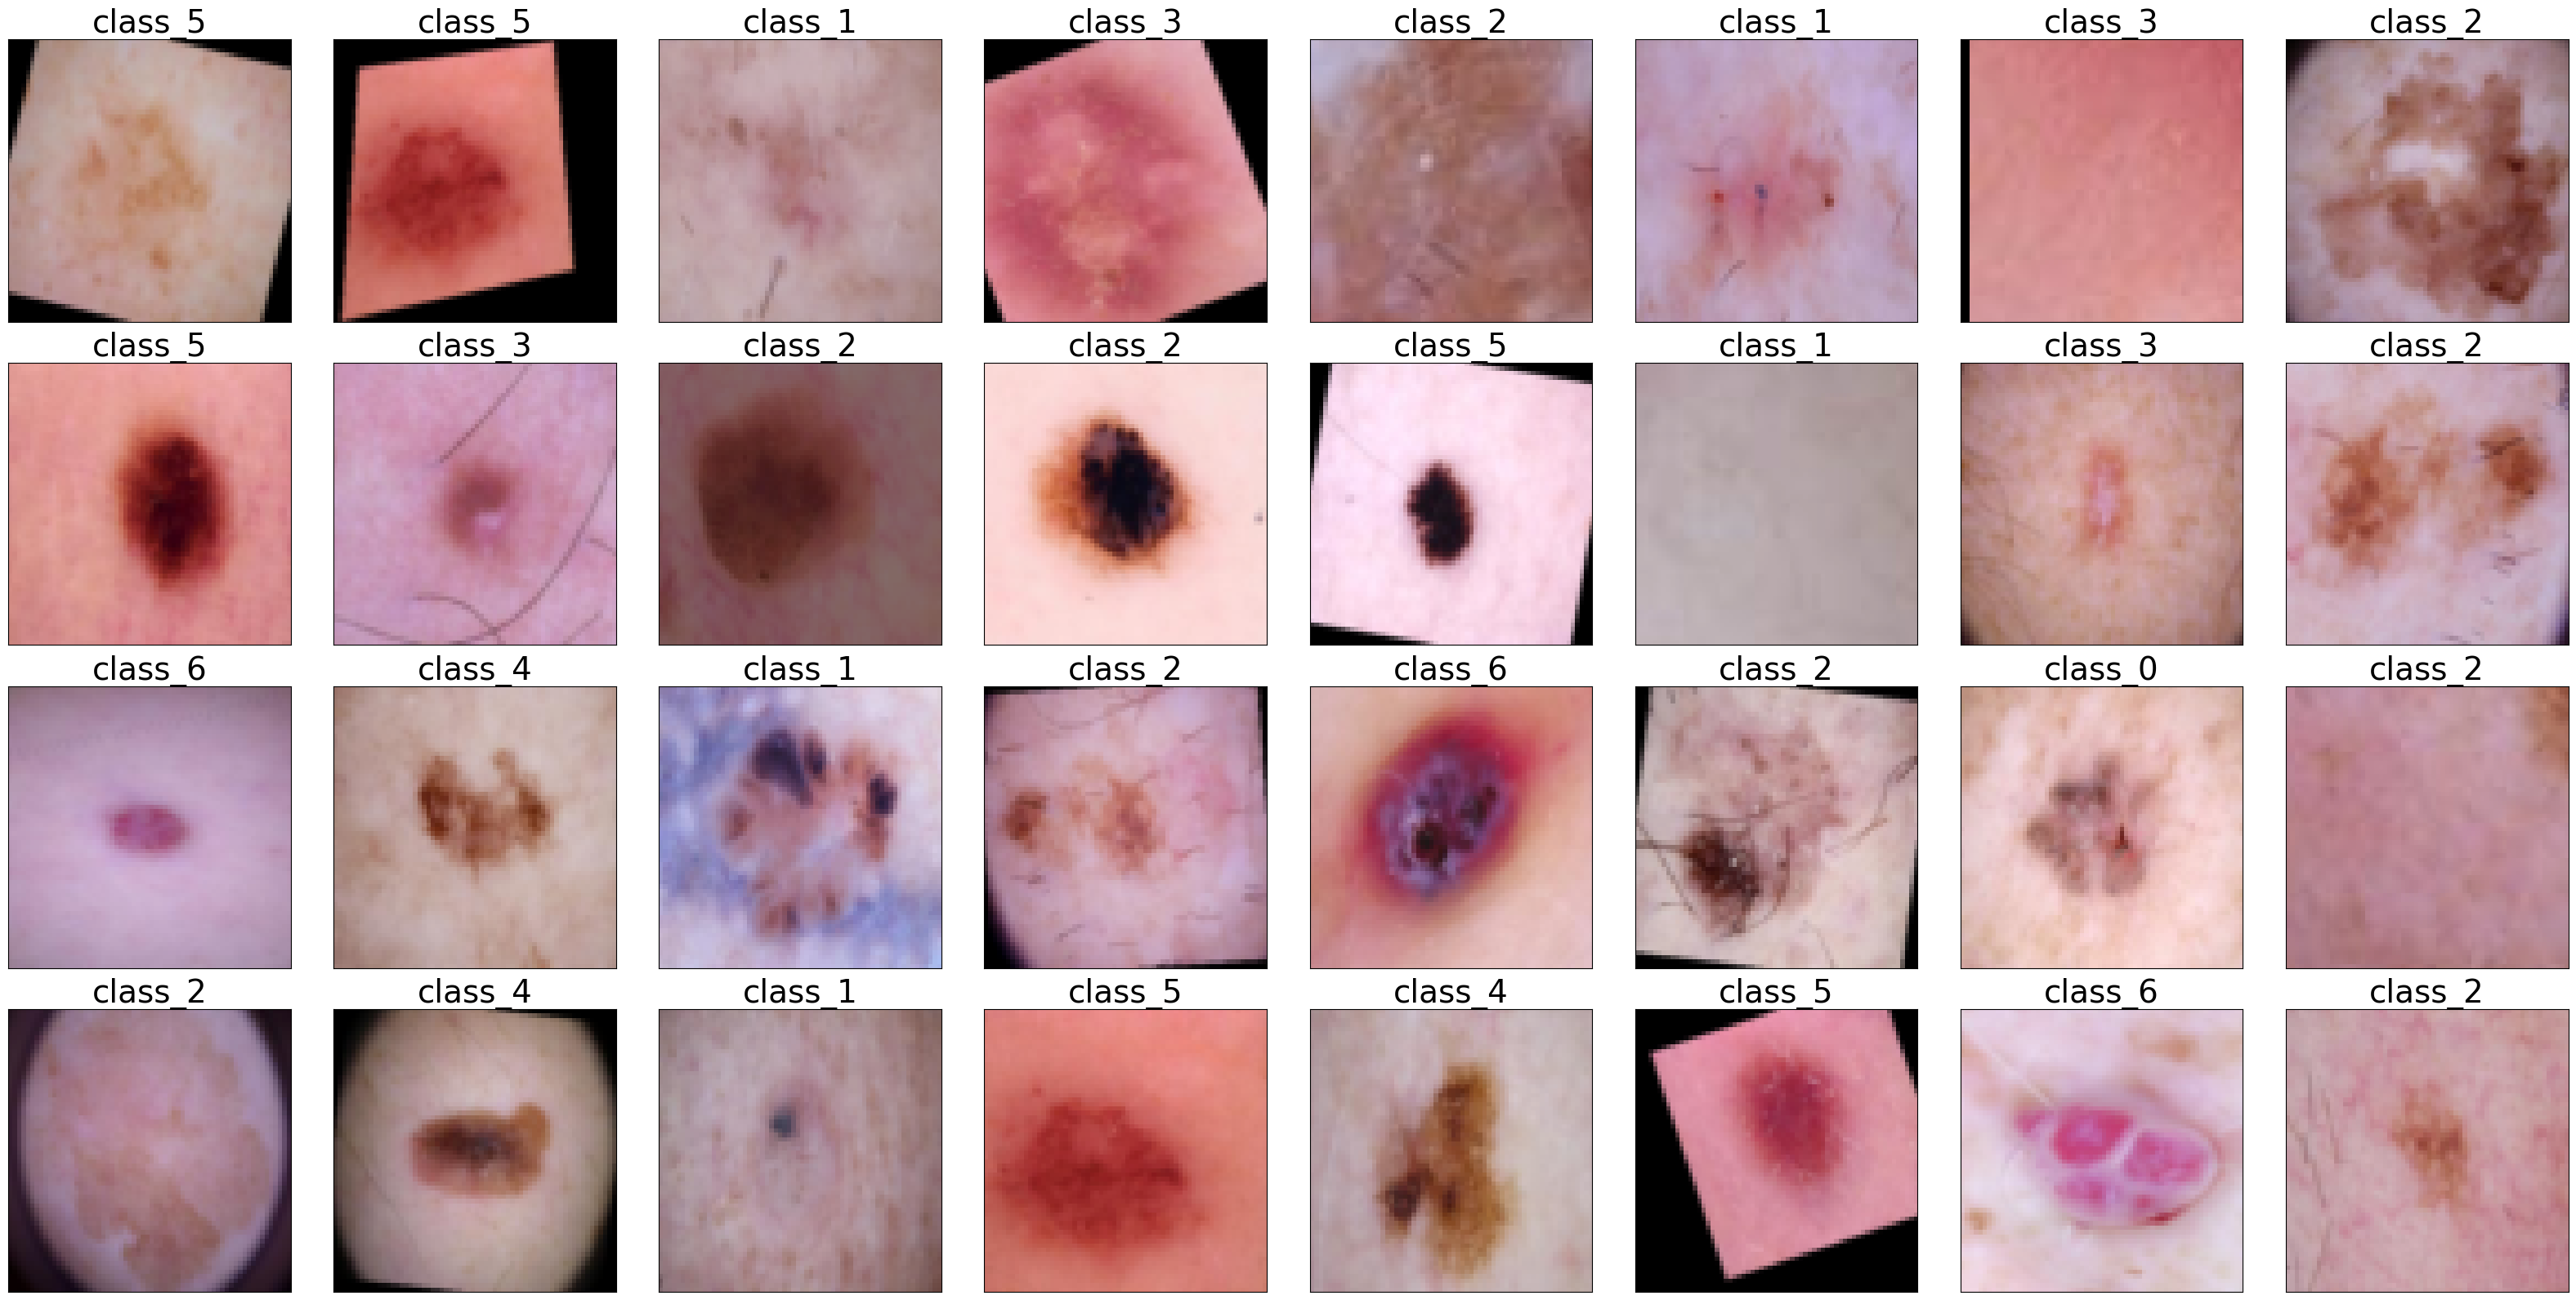

In [20]:
%%time

import itertools
import numpy as np
import os

nrows,ncols = rows_cols(batch_size)

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*4,nrows*4),
                       subplot_kw={'facecolor': "#ebf5ff"})
rb_index = np.random.randint(0, len(train_dataloader))

# Obtener el batch correspondiente al índice aleatorio
imgs, labels = next(itertools.islice(train_dataloader, rb_index, rb_index+1))

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[labels[i]], fontsize=28)
  #ax.imshow(imgs[i].permute(1,2,0)) # for unnormalized
  ax.imshow(inv_normalize(imgs[i]).permute(1,2,0)) # for unnormalized

fig.tight_layout()

## 3. Define a [Convolutional Neural Network](https://pytorch.org/docs/stable/nn.html)

---
**import Libraries**

---


In [21]:
import torch.nn as nn
import torch.nn.functional as F

---
**Ensure reproducibility**

---

In [22]:
import random
import numpy as np
import torch

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    # Ensure that the same deterministic algorithms are used
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)  # Example seed value

---
**Define the Model**

---
Our idea is to load a previously trained model and retrain it using early stopping. To do this, we need to replicate the neural network model that we previously saved.

In [23]:
import torch.nn as nn

class myCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            # Layer 1: Conv2d + BatchNorm + ReLU
            # Input: (batch_size, 3, 64, 64)
            # Output: (batch_size, 32, 64, 64)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            # Layer 2: Conv2d + BatchNorm + ReLU
            # Input: (batch_size, 32, 64, 64)
            # Output: (batch_size, 64, 64, 64)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # Layer 3: MaxPool2d
            # Input: (batch_size, 64, 64, 64)
            # Output: (batch_size, 64, 32, 32)
            nn.MaxPool2d(2, 2),

            # Layer 4: Conv2d + BatchNorm + ReLU
            # Input: (batch_size, 64, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 5: Conv2d + BatchNorm + ReLU
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 32, 32)
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 6: MaxPool2d
            # Input: (batch_size, 128, 32, 32)
            # Output: (batch_size, 128, 16, 16)
            nn.MaxPool2d(2, 2),

            # Layer 7: Conv2d + BatchNorm + ReLU
            # Input: (batch_size, 128, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 8: Conv2d + BatchNorm + ReLU
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 16, 16)
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 9: MaxPool2d
            # Input: (batch_size, 256, 16, 16)
            # Output: (batch_size, 256, 8, 8)
            nn.MaxPool2d(2, 2),

            # Layer 10: Flatten
            # Input: (batch_size, 256, 8, 8)
            # Output: (batch_size, 16384)
            nn.Flatten(),

            # Layer 11: Linear + BatchNorm + ReLU
            # Input: (batch_size, 16384)
            # Output: (batch_size, 128)
            nn.Linear(256*8*8, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            # Layer 12: Linear + BatchNorm + ReLU
            # Input: (batch_size, 128)
            # Output: (batch_size, 64)
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            # Layer 13: Linear
            # Input: (batch_size, 64)
            # Output: (batch_size, 7)
            nn.Linear(64, 7)
        )

    def forward(self, xb):
        return self.network(xb)


### Setting the Computing Device

Let's change the execution environment to T4.

---
**Setting CUDA environment**

---

>**NOTE:** Outside of Google Colab, it is necessary to explicitly specify the device (GPU or CPU) and manage model parallelization if using multiple GPUs. This is crucial to ensure the model runs on the intended GPU and leverages the available hardware effectively. While Google Colab manages GPU allocation automatically, specifying the device ("cuda") and using `nn.DataParallel` can still be beneficial for explicit control and utilization of available resources, especially if you have specific requirements or want to ensure optimal performance. However, for many basic use cases, simply  letting Colab manage the resources with automatic GPU selection) will suffice.

---
**Setting CUDA environment**

---

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


model = myCNN().to(device)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

print(model)

Using cuda device
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=128, bias=True)
    (17): ReLU()
    (18): Linear



---
**Display the summary of our model**

---

In [25]:
!pip install torchsummary -q

from torchsummary import summary

summary(model, (3,64,64)) # input = [3,64,64]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
              ReLU-2           [-1, 32, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          18,496
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]         147,584
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         295,168
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
             ReLU-14          [-1, 256,

### Define a Loss function and optimizer




---

**Define a Loss Function and a Optimizer**

---


In [26]:
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.001 )
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Defining Training Loop

---
**Defining train**

---

In [27]:
def train(dataloader, model, criterion, optimizer):
  running_loss, corrects, current = 0, 0, 0
  size = len(dataloader.dataset) # number images from dataset
  print(f"Training:")
  model.train() #training mode on
  loop = tqdm(train_dataloader) # Initialize a progress bar
  for batch, (X, y) in enumerate(loop):
    # take data (X) and label (y) from a batch
    X, y = X.to(device), y.to(device) # Move the data and labels
                                      # to the device (CPU or GPU)

    # forward pass
    preds = model(X) # Compute predictions
    loss = criterion(preds, y) # Compute the loss between predictions and labels

    # backpropagation
    optimizer.zero_grad()   # zero the gradient buffers
    loss.backward()         # compute gradients to backwards
    optimizer.step()        # Does the "update weights" of model

    # Calculate Output Metrics training_loss, training_accuracy

    # 1. loss.item() contains the loss of entire mini-batch converted to scalar
    running_loss += loss.item() # Accumulate the loss for this batch

    # 2. current image (last image in the batch) for progressive bar
    current += len(X) # Update the current number of processed images

    # 3. From the predictions, I select the index (class) of the one with
    # the highest value and compare it with the label (class). The boolean value
    # is converted into a float (true becomes 1, false becomes 0), and all are
    # summed up. Finally, 'item' converts them into a scalar value.
    # This way, 'corrects' reflects the number of correct predictions (accuracy)
    corrects += (preds.argmax(1) == y).type(torch.float).sum().item()

    # 4. running loss is the sum of our loss. Training loss is a running average
    # through batches
    training_loss = running_loss/(batch+1)

    # 5. Training accuracy = number of corrects predictions/number of processed images
    training_accuracy = corrects/current

    # Update the progress bar with current epoch, batch, and metrics
    loop.set_description(f'[{epoch + 1}/{epochs} epochs, {current:>5d}/{len(train_dataloader.dataset):>5d} data]')
    loop.set_postfix(Training_Loss=training_loss, Accuracy=f'{100*corrects/current:>0.1f}%')

  return training_loss, training_accuracy

---
**Defining val**

---

In [28]:
def val(dataloader, model, criterion):
  size = len(dataloader.dataset) # number images from dataset to evaluate
  num_batches = len(dataloader)  # number of batches

  # Evaluation (test)) Mode
  model.eval()

  val_loss, corrects = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # prediction for a dataset not used in training
      # compute prediction error and number of corrects
      # through batches
      preds = model(X)
      val_loss += criterion(preds, y).item()
      corrects += (preds.argmax(1) == y).type(torch.float).sum().item()
  val_loss /= num_batches
  corrects /= size
  print(f"Val: \n Accuracy: {(100*corrects):>0.1f}%, val_Loss: {val_loss:>8f} \n")

  return val_loss, corrects

To create directories named `train1`, `train2`, etc., each time you execute a training loop, you can modify the code to check the number of existing training directories and then create the next directory in sequence. Here's an example of how you could do this:

---
**Create Train directories**

---

In [29]:
import os
import torchvision.models as models

def create_train_dir():
  """
  Creates a directory named train within the current directory.
  """
  # Current directory
  current_dir = os.getcwd()
  print(current_dir)

  # Base path to the "train" directory
  base_train_dir = os.path.join(current_dir, 'train')

  # Determine the next training directory name
  train_dirs = [d for d in os.listdir(current_dir) if d.startswith('train') and d[5:].isdigit()]
  train_dirs.sort(key=lambda x: int(x[5:]) if x[5:].isdigit() else -1)
  next_train_num = 1 if not train_dirs else int(train_dirs[-1][5:]) + 1
  train_dir = os.path.join(current_dir, f'train{next_train_num}')

  # Create the next training directory
  os.makedirs(train_dir, exist_ok=True)
  print(f"Training directory: {train_dir}")
  return train_dir

---
**Define checkpoint and resume function**

---

In [30]:
import torch

def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])



 ---
 **Best Model and Early Stopping**

 ---

In [31]:
%%time

from tqdm import tqdm # progress bar
import csv

early_stop_thresh = 7
best_accuracy = -1
best_epoch = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
os.chdir(HOME)
train_dir = create_train_dir()


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, os.path.join(train_dir,"best_model.pth"))
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")

/teamspace/studios/this_studio
Training directory: /teamspace/studios/this_studio/train1
Training:


[1/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.79it/s, Accuracy=18.9%, Training_Loss=1.9] 


Val: 
 Accuracy: 31.4%, val_Loss: 1.713600 

best model in epoch=1 with Accuracy=31.4%
Training:


[2/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.36it/s, Accuracy=34.2%, Training_Loss=1.64]


Val: 
 Accuracy: 51.4%, val_Loss: 1.251657 

best model in epoch=2 with Accuracy=51.4%
Training:


[3/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.94it/s, Accuracy=48.4%, Training_Loss=1.33]


Val: 
 Accuracy: 54.8%, val_Loss: 1.093699 

best model in epoch=3 with Accuracy=54.8%
Training:


[4/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.32it/s, Accuracy=56.2%, Training_Loss=1.14]


Val: 
 Accuracy: 60.5%, val_Loss: 1.060852 

best model in epoch=4 with Accuracy=60.5%
Training:


[5/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.48it/s, Accuracy=63.4%, Training_Loss=0.973]


Val: 
 Accuracy: 57.6%, val_Loss: 1.063727 

Training:


[6/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.33it/s, Accuracy=69.0%, Training_Loss=0.838]


Val: 
 Accuracy: 63.8%, val_Loss: 0.934410 

best model in epoch=6 with Accuracy=63.8%
Training:


[7/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.42it/s, Accuracy=73.8%, Training_Loss=0.717]


Val: 
 Accuracy: 56.7%, val_Loss: 1.267120 

Training:


[8/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.72it/s, Accuracy=77.5%, Training_Loss=0.619]


Val: 
 Accuracy: 59.5%, val_Loss: 1.233666 

Training:


[9/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.08it/s, Accuracy=81.0%, Training_Loss=0.537]


Val: 
 Accuracy: 60.0%, val_Loss: 1.308346 

Training:


[10/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.68it/s, Accuracy=83.3%, Training_Loss=0.476]


Val: 
 Accuracy: 60.5%, val_Loss: 1.301148 

Training:


[11/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.10it/s, Accuracy=84.8%, Training_Loss=0.433]


Val: 
 Accuracy: 60.5%, val_Loss: 1.629907 

Training:


[12/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.88it/s, Accuracy=85.9%, Training_Loss=0.403]


Val: 
 Accuracy: 65.2%, val_Loss: 1.375320 

best model in epoch=12 with Accuracy=65.2%
Training:


[13/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.27it/s, Accuracy=86.8%, Training_Loss=0.379]


Val: 
 Accuracy: 60.5%, val_Loss: 1.450707 

Training:


[14/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.63it/s, Accuracy=87.5%, Training_Loss=0.354]


Val: 
 Accuracy: 65.7%, val_Loss: 1.408508 

best model in epoch=14 with Accuracy=65.7%
Training:


[15/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.09it/s, Accuracy=88.1%, Training_Loss=0.336]


Val: 
 Accuracy: 59.5%, val_Loss: 1.511516 

Training:


[16/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.61it/s, Accuracy=88.5%, Training_Loss=0.327]


Val: 
 Accuracy: 64.3%, val_Loss: 1.380131 

Training:


[17/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.26it/s, Accuracy=88.9%, Training_Loss=0.313]


Val: 
 Accuracy: 59.0%, val_Loss: 1.554626 

Training:


[18/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:47<00:00, 43.95it/s, Accuracy=89.3%, Training_Loss=0.302]


Val: 
 Accuracy: 63.3%, val_Loss: 1.759842 

Training:


[19/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.05it/s, Accuracy=89.4%, Training_Loss=0.295]


Val: 
 Accuracy: 60.0%, val_Loss: 1.542358 

Training:


[20/20 epochs, 66150/66150 data]: 100%|██████████| 2068/2068 [00:46<00:00, 44.38it/s, Accuracy=89.9%, Training_Loss=0.286]


Val: 
 Accuracy: 58.1%, val_Loss: 1.831427 

Done!. Finished Training
CPU times: user 6min 59s, sys: 50.7 s, total: 7min 50s
Wall time: 15min 43s


---
**Displaying the metrics curves model (only 20 last epochs)**

---

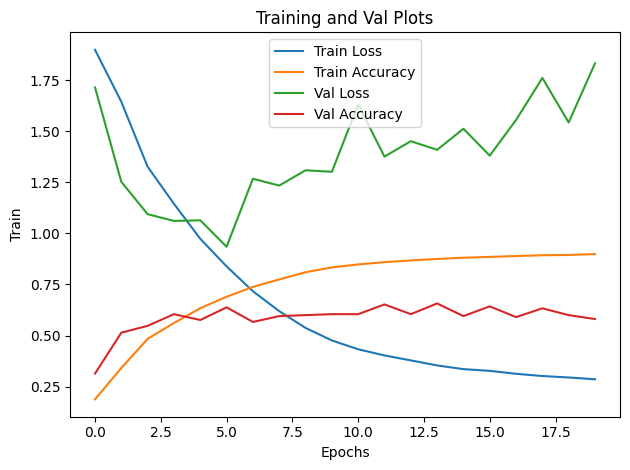

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(epoch+1), loss_train_history, label="Train Loss")
ax.plot(range(epoch+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(epoch+1), loss_val_history, label="Val Loss")
ax.plot(range(epoch+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

## Validating our model


---
**Validation Metrics**

---

In [39]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

# Define una función para obtener las predicciones del modelo
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # Si estás utilizando GPU, mueve los datos a la GPU
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Define el dispositivo (CPU o GPU) en el que se realizarán las operaciones
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo guardado
print(train_dir)
model_file = os.path.join(train_dir,f"best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Supongamos que 'val_dataloader' es tu DataLoader de validación

# Definir y cargar el modelo
# Asegúrate de definir tu modelo adecuadamente
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Obtén las predicciones del modelo y las etiquetas verdaderas del conjunto de validación
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calcular la matriz de confusión
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Extraer los valores de la matriz de confusión
tn, fp, fn, tp = cm.ravel()

# Imprimir los valores
print("Verdaderos negativos (TN):", tn)
print("Falsos positivos (FP):", fp)
print("Falsos negativos (FN):", fn)
print("Verdaderos positivos (TP):", tp)


/teamspace/studios/this_studio/train1


ValueError: too many values to unpack (expected 4)

In [2]:
import torch
import os
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

# Define una función para obtener las predicciones del modelo
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # Si estás utilizando GPU, mueve los datos a la GPU
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Define el dispositivo (CPU o GPU) en el que se realizarán las operaciones
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo guardado
train_dir = "/teamspace/studios/this_studio/train1"
model_file = os.path.join(train_dir, "best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Supongamos que 'val_dataloader' es tu DataLoader de validación

# Definir y cargar el modelo
# Asegúrate de definir tu modelo adecuadamente
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Obtén las predicciones del modelo y las etiquetas verdaderas del conjunto de validación
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calcular la matriz de confusión
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Imprimir la matriz de confusión completa
print("Matriz de Confusión:")
print(cm)

# Si deseas obtener métricas como precisión, sensibilidad, etc. para múltiples clases,
# puedes calcularlas de la siguiente manera:

# Calcular precisión por clase
precision_por_clase = cm.diagonal() / cm.sum(axis=0)
print("Precisión por clase:", precision_por_clase)

# Calcular recall por clase
recall_por_clase = cm.diagonal() / cm.sum(axis=1)
print("Recall por clase:", recall_por_clase)

# Calcular F1-score por clase
f1_por_clase = 2 * (precision_por_clase * recall_por_clase) / (precision_por_clase + recall_por_clase)
print("F1-score por clase:", f1_por_clase)


NameError: name 'myCNN' is not defined

---
**Get confusion metrics**

---

In [1]:
!pip install seaborn -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'etiquetas_val' are the true labels and 'predicciones_val' are the model predictions

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Define the labels for the confusion matrix
labels = [f'Class {i}' for i in range(len(cm))]

# Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()


NameError: name 'etiquetas_val' is not defined

---

**Display a ROC curve**

---


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Supongamos que 'predicciones_val' y 'etiquetas_val' son las predicciones y etiquetas verdaderas del conjunto de validación
# Obtenidas previamente usando la función obtener_predicciones()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(etiquetas_val, predicciones_val)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ValueError: multiclass format is not supported